In [1]:
!jt -r

Reset css and font defaults in:
C:\Users\tetic\.jupyter\custom &
C:\Users\tetic\AppData\Roaming\jupyter\nbextensions


In [7]:
import gensim
from gensim.models.callbacks import CallbackAny2Vec
class logger(CallbackAny2Vec):
    None
    
embedding_model = gensim.models.Word2Vec.load('word2vec.model')
print(embedding_model)
embedding = embedding_model.wv.syn0

Word2Vec(vocab=452130, size=100, alpha=0.025)


/home/teticio/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


In [8]:
import csv
print('Read in tracks...')
tracks = {}
with open('popular_tracks.csv', "r", encoding='utf-8') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
        columns = str(row)[2:-2].split(';')
        tracks[columns[0]] = [columns[1] + ' - ' +
                              columns[2], columns[3]] # title - artist, url
print(f'Number of tracks: {len(tracks)}')

Read in tracks...
Number of tracks: 452130


In [9]:
w2c = []
for item in embedding_model.wv.vocab:
    if item in tracks and tracks[item][1] != '':
        w2c.append((item, tracks[item][0], embedding_model.wv.vocab[item].count))
w2c = sorted(w2c, key=lambda x: x[2], reverse=True)
w2c[0:10]

[('3ee8Jmje8o58CHK66QrVC2', 'XXXTENTACION - SAD!', 26818),
 ('7dt6x5M1jzdTEt8oCbisTK', 'Post Malone - Better Now', 26773),
 ('5IaHrVsrferBYDm0bDyABy', 'Tyga - Taste (feat. Offset)', 25420),
 ('7m9OqQk4RVRkw9JJdeAw96', 'XXXTENTACION - Jocelyn Flores', 24823),
 ('0JP9xo3adEtGSdUEISiszL', 'XXXTENTACION - Moonlight', 24542),
 ('2xLMifQCjDGFmkHkpNLD9h', 'Travis Scott - SICKO MODE', 24023),
 ('4S8d14HvHb70ImctNgVzQQ', 'Kanye West - I Love It (& Lil Pump)', 23420),
 ('58q2HKrzhC3ozto2nDdN4z', 'Cardi B - I Like It', 22088),
 ('2E124GmJRnBJuXbTb4cPUB',
  '6ix9ine - FEFE (feat. Nicki Minaj & Murda Beatz)',
  20608),
 ('4qKcDkK6siZ7Jp1Jb4m0aL', 'BlocBoy JB - Look Alive (feat. Drake)', 19028)]

In [10]:
import numpy as np
from tqdm import tqdm

vectors = None
track_names = {}
for i, _ in enumerate(tqdm(w2c[0:10000])):
    track_names[i] = _[1]
    vec = np.expand_dims(embedding[embedding_model.wv.vocab[_[0]].index], axis=0)
    if vectors is None:
        vectors = vec
    else:
        vectors = np.concatenate((vectors, vec), axis=0)

100%|██████████| 10000/10000 [00:01<00:00, 7219.87it/s]


In [11]:
%matplotlib inline
# importing bokeh library for interactive data visualization
import pandas as pd
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

def plot_tsne(embedding_matrix, index_to_word, num_words = None, title = 't-SNE'):
    matrix = embedding_matrix
    if num_words is not None:
        matrix = matrix[:num_words,:]
    labels = [index_to_word.get(_, "<UNK>") for _ in range(matrix.shape[0])]
    
    # defining the chart
    output_notebook()
    fig = bp.figure(plot_width=700, plot_height=600, title=title,
                    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                    x_axis_type=None, y_axis_type=None, min_border=1)

    # dimensionality reduction. converting the vectors to 2d vectors
    from sklearn.manifold import TSNE
    tsne_model = TSNE(n_components=2, verbose=0, random_state=0)
    tsne_w2v = tsne_model.fit_transform(matrix)

    # putting everything in a dataframe
    tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
    tsne_df['words'] = labels

    # plotting. the corresponding word appears when you hover on the data point.
    fig.scatter(x='x', y='y', source=tsne_df)
    hover = fig.select(dict(type=HoverTool))
    hover.tooltips={"": "@words"}
    show(fig)

In [12]:
plot_tsne(vectors, track_names, title = 'Track2Vec t-SNE')

Loading BokehJS ...

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('spectrograms/train/000JCyEkMFumqCZQJAORiQ.png')

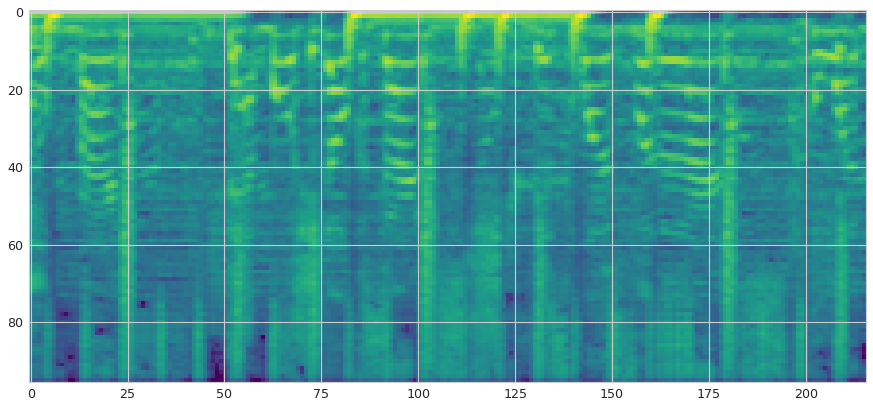

In [14]:
plt.figure(figsize = (15, 30))
plt.imshow(img)

In [15]:
import pickle

mp3tovecs = pickle.load(open('../spotifytovec.p', 'rb'))
track_names = {}
vectors = None
for _ in tqdm(w2c[0:10000]):
    try:
        vec = np.expand_dims(mp3tovecs[_[0]], axis=0)
        if vectors is None:
            vectors = vec
        else:
            vectors = np.concatenate((vectors, vec), axis=0)
        track_names[vectors.shape[0]-1] = _[1]
    except:
        pass

100%|██████████| 10000/10000 [00:01<00:00, 7350.41it/s]


In [16]:
len(track_names), vectors.shape

(10000, (10000, 100))

In [17]:
plot_tsne(vectors, track_names, title = 'Mp3ToVec t-SNE')

Loading BokehJS ...